## Dimensionality Homework

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [4]:
import re
import argparse
import csv
from collections import Counter
from sklearn import datasets
import sklearn

In [27]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST Original")
X = mnist.data / 255.0
y = mnist.target

### 1. Use PCA to reduce the dimensionality

####      A. How many components did you use? Why?

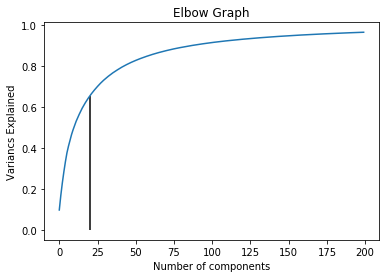

In [23]:
pca_ = PCA(n_components=200)
X_pca_ = pca_.fit_transform(X)
cum_ratio = np.cumsum(pca_.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.xlabel('Number of components')
plt.ylabel('Variancs Explained')
plt.title('Elbow Graph');

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


We seek to determine the number of components we need in order to determine at least 95% of the variance. Above, we see that we need at least 154 components. We also see an elbow in our graph around 22 components, as our rate of reduction in variance deceases after that.

####      B. Plot the first two components. Do you notice any trends? What is this plot showing us?

In [23]:
#Use pca to get 2 main components
pca_ = PCA(n_components=2)
principalComponents = pca_.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

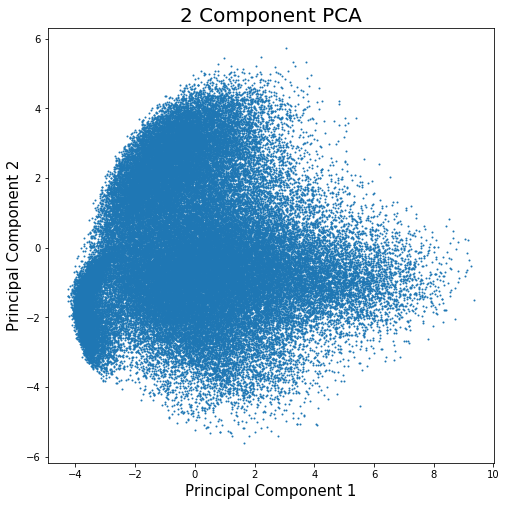

In [30]:
#plot the components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.scatter(principalDF['principal component 1'], principalDF['principal component 2'], s = 1)


Plotting the data in this way takes the original multi-dimensional data and condenses it to just two dimensions, "Principal Component 1" and "Principal Component 2." These are the two main dimensions of variation. We notice that the data does tend to cluster a little bit, around points like (-3,-2) as well as horizontally along the (-1) of Principal Component 2, and another cluster appears around (-1,3).

#### C. Why would you use PCA? What is it doing? And what are the drawbacks?

PCA takes high dimensionalty data and makes it vizually understandable. It creates 2 main components wich maximize the variance, component 1 which has the greatest possible variance, and then calculates component 2 so as to be orthogonal to component 1. A drawback is that the components don't mean anything by themselves, as they are simply a combination of the variables in the data. This can make it hard to interpret.

#### D. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [51]:
approximation = pca.inverse_transform(lower_dimensional_data)


#Create a function to compare the graphs...
def groupcomp(x):
    plt.figure(figsize=(8,4));
    
    # Original Image
    plt.subplot(1, 2, 1);
    plt.imshow(mnist.data[x].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
    plt.xlabel('784 components', fontsize = 14)
    plt.title('Original Image', fontsize = 20);

    # 154 principal components
    plt.subplot(1, 2, 2);
    plt.imshow(approximation[x].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
    plt.xlabel('154 components', fontsize = 14)
    plt.title('95% of Explained Variance', fontsize = 20);

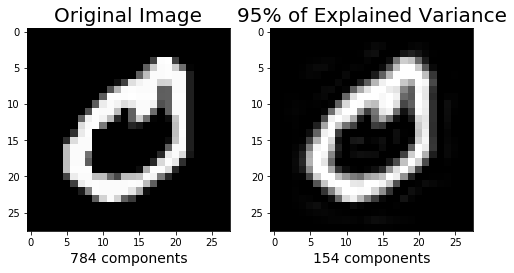

In [52]:
groupcomp(1)

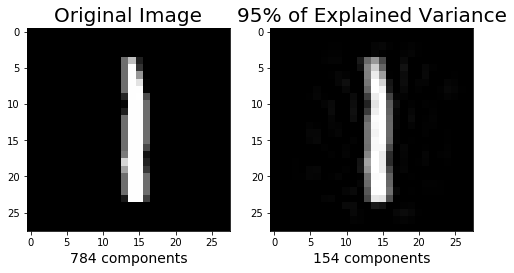

In [55]:
groupcomp(12000)

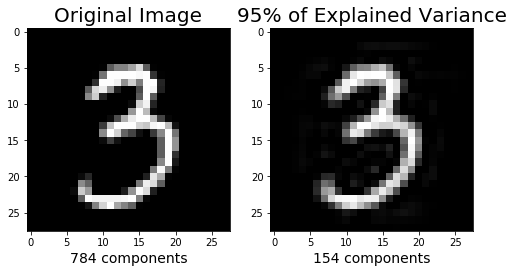

In [57]:
groupcomp(20000)

These images look pretty great! Even though the number of components is drastically reduced, it is still easy to see which number they are.

In [ ]:
#The following link helped me to figure this part out: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

### 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

In [64]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.183s...
[t-SNE] Computed neighbors for 10000 samples in 51.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.160024
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.166389
[t-SNE] Error after 1000 iterations: 1.716593


##### First we'll test different perplexities...

Text(0.5,1,'2 Components With Perplexity = 50')

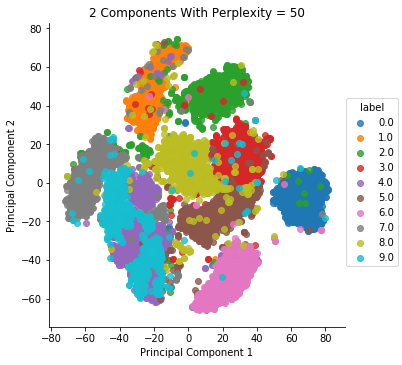

In [72]:
#perplexity 50
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("2 Components With Perplexity = 50")

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.098s...
[t-SNE] Computed neighbors for 10000 samples in 49.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.916254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.243858
[t-SNE] Error after 1000 iterations: 1.840599


Text(0.5,1,'2 Components With Perplexity = 25')

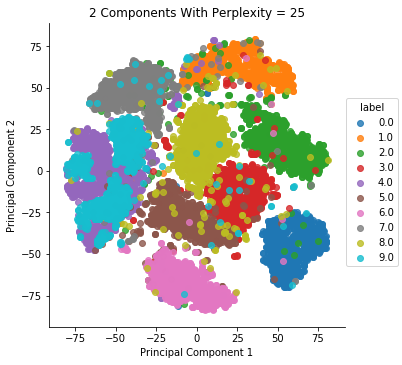

In [73]:
#perplexity = 25
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("2 Components With Perplexity = 25")

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.082s...
[t-SNE] Computed neighbors for 10000 samples in 44.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.300531
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.707870
[t-SNE] Error after 1000 iterations: 1.949992


Text(0.5,1,'2 Components With Perplexity = 5')

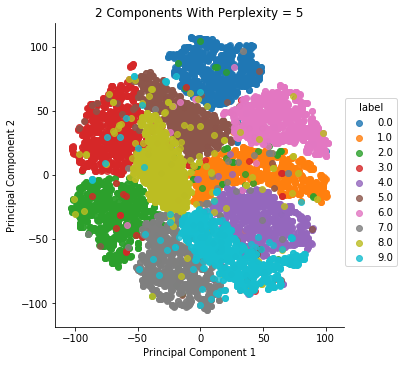

In [74]:
#perplexity = 5
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("2 Components With Perplexity = 5")

##### Now we'll try a smaller number of iterations...

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.102s...
[t-SNE] Computed neighbors for 10000 samples in 52.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.894830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.308960
[t-SNE] Error after 500 iterations: 2.144310


Text(0.5,1,'2 Components With Perplexity = 25')

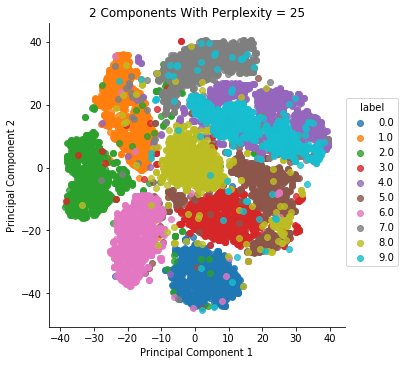

In [12]:
#iterations = 500
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=500, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("2 Components With Perplexity = 25")

##### Now let's try a different learning rate ...

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.082s...
[t-SNE] Computed neighbors for 10000 samples in 52.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.894830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.569023
[t-SNE] Error after 1000 iterations: 1.900345


Text(0.5,1,'2 Components With Perplexity = 25')

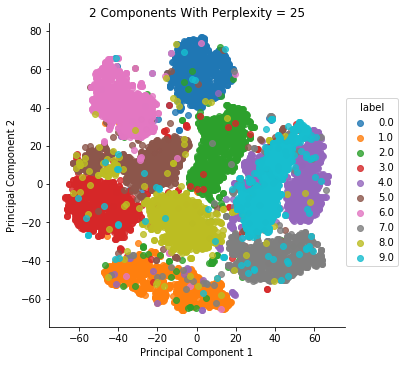

In [13]:
#learning rate = 100
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("2 Components With Perplexity = 25")

#### A. How does this plot differ from your PCA plot?

This plot identifies the specific clusters we are interested in, while the PCA plot only shows the maximized variance in a 2d setting.

#### B. How robust is it to changes in perplexity?

Surprisingly robust! While we note that the Error after 1000 iterations increaces and the mean sigma decreaces as perplexity decreaces, and the graphs are still very similar! It seems to still be doing a decent job at differentiating the numbers.

#### C. How robust is it to different learning rate and number of iterations? 

It is fairly robust in both settings! By cutting the number of iterations in half, the Error only increaces slightly. Additionally, even when I reduce the learning rate from 200 to 100, the Error remains similar, and the graphs are fairly readable. Obviously, if I were to drastically change these paramaters we would eventually start to expect different outcomes.

### 3. Perform k-means clustering: 

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_pca)
Xscaled = scaler.transform(X_pca)

In [8]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(Xscaled)
sk_clusters = kmeans.predict(Xscaled)

#### A. How did you choose k?

As there are 10 differenct numbers which each image could represent, it stands to reason that we would want k = 10. That is, we want 10 distinct clusters, one for each possible number. 

#### B. How did you evaluate your clustering?

In [41]:
from sklearn.metrics import silhouette_score

kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1).fit(Xscaled[rows[:n_select],:])
labels = kmeans_model.labels_
silhouette_score(Xscaled[rows[:n_select],:], labels, metric='euclidean')

-0.013726564052517915

Above, I used a silhouette score to evaluate my clustering, essentially measuring how distant and dense my clusters are. Unfortuantley, it did not do very well. Another way I could have evaluated would be the adjusted Rand index, whish would have comapared results to what they should have been.

#### C. Visualize your clusters using t-sne 

Text(0.5,1,'Clusters')

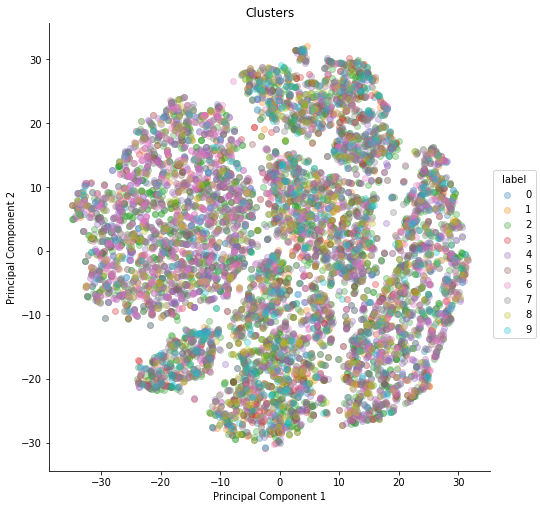

In [43]:
df_tsne = pd.DataFrame(tsne_results, columns=['Principal Component 1', 'Principal Component 2'])
df_tsne['label'] = labels

sns.lmplot(x='Principal Component 1', y='Principal Component 2',data=df_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=7)
ax = plt.gca()
ax.set_title("Clusters")

We see the clusters are not well organized by number ...

#### D. Did you scale your data?

Yes! As distance isn't a physical metric we are concerned with, it made sense to me to scale the data! While its possible this didn't make a large difference, it is unlikely in would have made my analysis any worse.

#### E. How robust is your clustering?

In [44]:
#iterations = 25
kmeans_model = KMeans(n_clusters=10, n_init=25, n_jobs=-1).fit(Xscaled[rows[:n_select],:])
labels = kmeans_model.labels_
silhouette_score(Xscaled[rows[:n_select],:], labels, metric='euclidean')

-0.019920862959260252

In [45]:
#get a different sample
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 500

kmeans_model = KMeans(n_clusters=10, n_init=25, n_jobs=-1).fit(Xscaled[rows[:n_select],:])
labels = kmeans_model.labels_
silhouette_score(Xscaled[rows[:n_select],:], labels, metric='euclidean')

-0.0039012952244458906

We see that the silhouette score remains unimpressive but consistent! So while it may not be getting the best score, it seems be consistent across this data set. Clustering often has problems with robustness however, so it is important to run it on various subsets.

### 4. Perform hierarchical clustering:

#### A. Plot your dendrogram

In [21]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

#### For the "Complete" dendrogram:

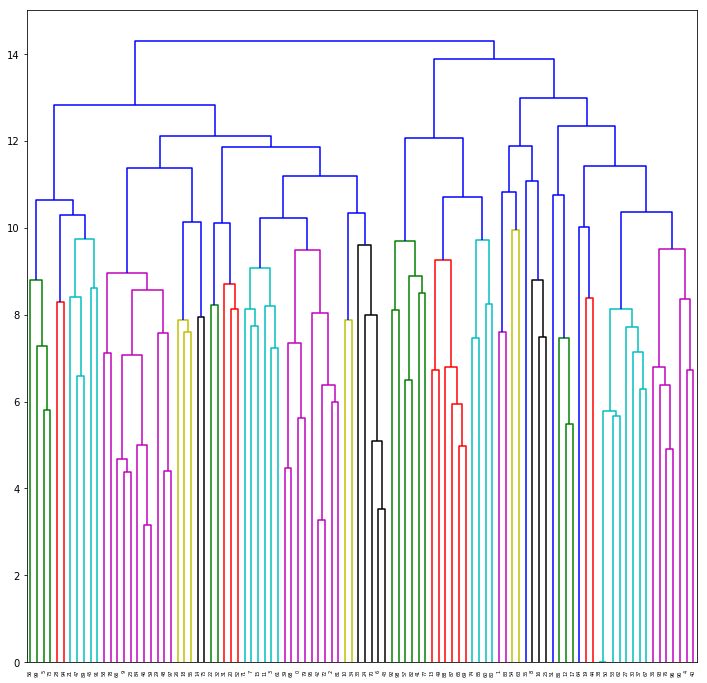

In [32]:
rand = np.random.randint(70000, size=100)
X_rand=X[rand,:]
Z = linkage(X_rand, 'complete')
plt.figure(figsize=(12, 12))
dn = hierarchy.dendrogram(Z)


#### For the "Average" dendrogram

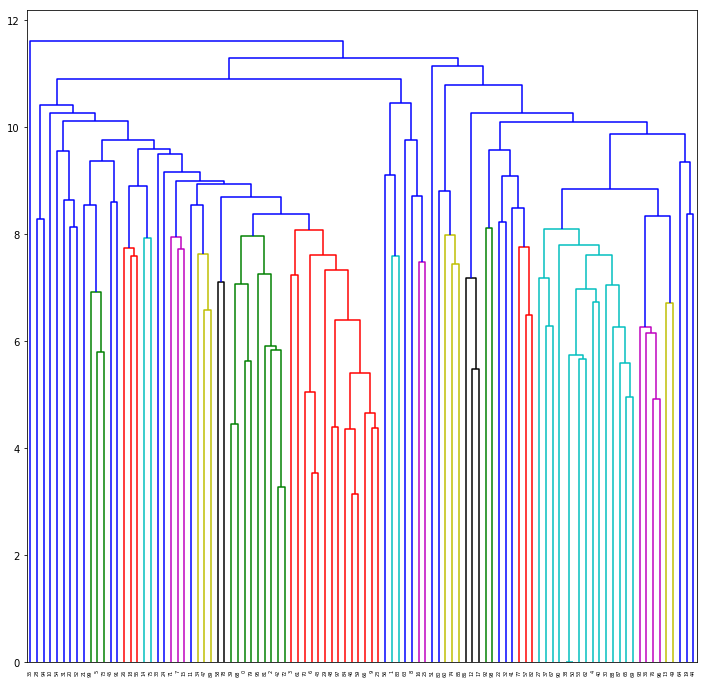

In [36]:
Z = linkage(X_rand, 'average')
plt.figure(figsize=(12, 12))
dn = hierarchy.dendrogram(Z)

#### For the "Ward" dendrogram:

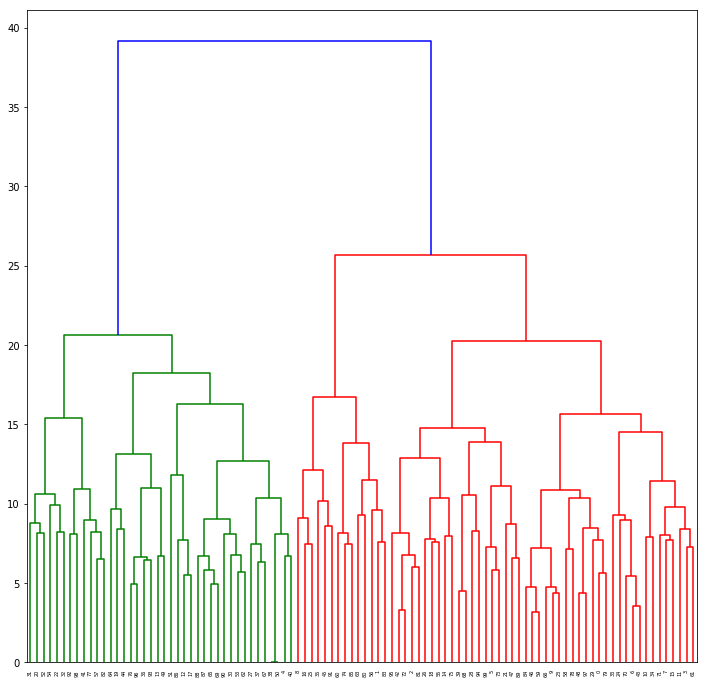

In [37]:
Z = linkage(X_rand, 'ward')
plt.figure(figsize=(12, 12))
dn = hierarchy.dendrogram(Z)

#### B. How many clusters seem reasonable based off your graph?

For most of them, 10-15 clusters seems reasonable. We come to this conclusion by looking at the length of the lines, knowing that the longer the line the more different each cluster is. Around 10 - 15 cluster we see the dendrogram starts to subdivide rapidly, meaning the differences become less obvious.

#### C. How does your dendrogram change with different linkage methods? 

We notice that "ward" is taller than "average" or "complete," implying that the differences are more obvious using "ward." While "complete" uses maximum distance, and "average" uses average distance, "ward" merges the two clusters which minimize the total within-cluster variance after merging. "Ward" is probably the dendrogram I would shoose to use in an analysis.

Thanks for all the help Conner!!